# Overfitting (1) 
## Reduce the network's size

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
# 2. Model
from keras import models, layers

<hr>

#### 원래 네트워크

In [7]:
org_model = models.Sequential()
org_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
org_model.add(layers.Dense(16, activation='relu'))
org_model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
org_model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [9]:
org_history = org_model.fit(partial_x_train, 
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=False)

#### 더 작은 네트워크로 변경

In [10]:
small_model = models.Sequential()
small_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
small_model.add(layers.Dense(6, activation='relu'))
small_model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
small_model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
small_history = small_model.fit(partial_x_train, 
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=False)

#### 더 큰 네트워크로 변경

In [13]:
large_model = models.Sequential()
large_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
large_model.add(layers.Dense(1024, activation='relu'))
large_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
large_model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
large_history = large_model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                               verbose=False)

<hr>

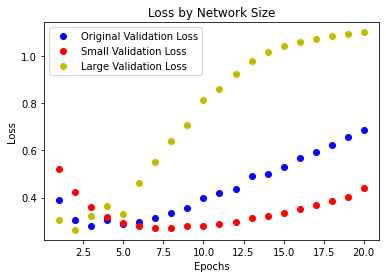

In [16]:
import matplotlib.pyplot as plt

org_val_loss = org_history.history['val_loss']
small_val_loss = small_history.history['val_loss']
large_val_loss = large_history.history['val_loss']

epochs = range(1, len(org_val_loss) + 1)

plt.plot(epochs, org_val_loss, 'bo', label='Original Validation Loss')
plt.plot(epochs, small_val_loss, 'ro', label='Small Validation Loss')
plt.plot(epochs, large_val_loss, 'yo', label='Large Validation Loss')

plt.title("Loss by Network Size")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()